In [1]:
import pandas
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
with open('mnist_784.csv') as file:
    print(file.encoding)

cp1252


In [2]:
# Reading the Dataset from a CSV file
# Splitting the dataset into features & labels. And further splitting into train & test parts

dataset = pandas.read_csv('mnist_784.csv',sep=',',encoding='cp1252')

features = np.array(dataset.drop('class',axis=1),'int16')
labels = np.array(dataset["class"],'int')

x_train, x_test, y_train, y_test = train_test_split(features,labels,train_size= 0.9, random_state= 0)

print(features.shape)

(70000, 784)


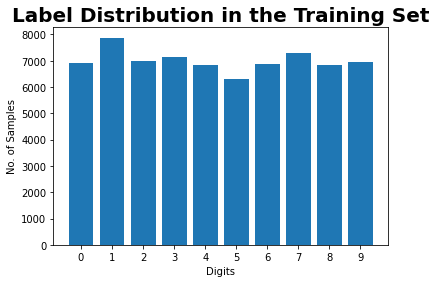

<Figure size 7500x7500 with 0 Axes>

In [4]:
# Visualisation of the training data set
# The distribution of labels for classification should be balanced for accurate predictions

digits, counts = np.unique(labels,return_counts=True)

chart = plt.bar(digits,counts)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylabel("No. of Samples")
plt.xlabel("Digits")
plt.title("Label Distribution in the Training Set",fontdict={'fontsize' : 20, 'fontweight' : 'bold'})
plt.figure(figsize=(25,25),edgecolor='red',dpi=300)
plt.show()

#plt.savefig('Label Distribution.png', dpi=150)

In [5]:
# Extracting HOG features from the train & test feature list

hog_list1 = []
for feature in x_train:
    item = hog(feature.reshape(28,28),orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),visualize=False)
    hog_list1.append(item)
hog_x_train = np.array(hog_list1,'float64')

hog_list2 = []
for feature in x_test:
    item = hog(feature.reshape(28,28),orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),visualize=False)
    hog_list2.append(item)
hog_x_test = np.array(hog_list2,'float64')

In [6]:
# Fitting Linear Model on the Train data & predicting the test data

linear = SGDClassifier(loss='perceptron')
linear.fit(hog_x_train,y_train)
linear_pred = linear.predict(hog_x_test)

acc_linear = accuracy_score(y_test,linear_pred)
f1_linear = f1_score(y_test,linear_pred,average='micro')

print("Classification Report for Linear Classifier :")
print(classification_report(y_test,linear_pred))
print("\n")
print("Accuracy : {}".format(acc_linear))
print("Precision : {}".format(precision_score(y_test,linear_pred,average='micro')))
print("Recall : {}".format(recall_score(y_test,linear_pred,average='micro')))
print("F1 Score : {}\n".format(f1_linear))
print("\n")
print("Confusion Matrix for Linear Classifier :\n")
print(confusion_matrix(y_test,linear_pred))

Classification Report for Linear Classifier :
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       705
           1       0.98      0.93      0.95       815
           2       0.81      0.83      0.82       707
           3       0.70      0.84      0.76       684
           4       0.91      0.65      0.76       661
           5       0.80      0.87      0.83       605
           6       0.84      0.86      0.85       674
           7       0.92      0.77      0.84       760
           8       0.74      0.82      0.78       693
           9       0.73      0.52      0.61       696

    accuracy                           0.81      7000
   macro avg       0.81      0.80      0.80      7000
weighted avg       0.82      0.81      0.80      7000



Accuracy : 0.8061428571428572
Precision : 0.8061428571428572
Recall : 0.8061428571428572
F1 Score : 0.8061428571428572



Confusion Matrix for Linear Classifier :

[[672   1   5   4   0   5   9

In [7]:
# Fitting KNN Model on the Train data & predicting the test data

knn = KNeighborsClassifier(n_neighbors= 5,weights='uniform')
knn.fit(hog_x_train,y_train)
knn_pred = knn.predict(hog_x_test)

acc_knn = accuracy_score(y_test,knn_pred)
f1_knn = f1_score(y_test,knn_pred,average='micro')

print("Classification Report for KNN Classifier :")
print(classification_report(y_test,knn_pred))
print("\n")
print("Accuracy : {}".format(acc_knn))
print("Precision : {}".format(precision_score(y_test,knn_pred,average='micro')))
print("Recall : {}".format(recall_score(y_test,knn_pred,average='micro')))
print("F1 Score : {}\n".format(f1_knn))
print("\n")
print("Confusion Matrix for KNN Classifier :\n")
print(confusion_matrix(y_test,knn_pred))

Classification Report for KNN Classifier :
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       705
           1       0.97      0.94      0.96       815
           2       0.82      0.91      0.86       707
           3       0.77      0.83      0.80       684
           4       0.92      0.79      0.85       661
           5       0.93      0.84      0.88       605
           6       0.84      0.92      0.88       674
           7       0.95      0.83      0.89       760
           8       0.81      0.88      0.84       693
           9       0.84      0.74      0.79       696

    accuracy                           0.86      7000
   macro avg       0.87      0.86      0.86      7000
weighted avg       0.87      0.86      0.86      7000



Accuracy : 0.8641428571428571
Precision : 0.8641428571428571
Recall : 0.8641428571428571
F1 Score : 0.8641428571428571



Confusion Matrix for KNN Classifier :

[[658   4   1   2   0   2  16   1  

In [8]:
# Fitting Linear Support Vector Machine(SVM) Model on the Train data & predicting the test data

svm_linear = SVC(kernel='linear')
svm_linear.fit(hog_x_train,y_train)
svm_linear_pred = svm_linear.predict(hog_x_test)

acc_svm_linear = accuracy_score(y_test,svm_linear_pred)
f1_svm_linear = f1_score(y_test,svm_linear_pred,average='micro')

print("Classification Report for Linear SVM Classifier :")
print(classification_report(y_test,svm_linear_pred))
print("\n")
print("Accuracy : {}".format(acc_svm_linear))
print("Precision : {}".format(precision_score(y_test,svm_linear_pred,average='micro')))
print("Recall : {}".format(recall_score(y_test,svm_linear_pred,average='micro')))
print("F1 Score : {}\n".format(f1_svm_linear))
print("\n")
print("Confusion Matrix for Linear SVM Classifier :\n")
print(confusion_matrix(y_test,svm_linear_pred))

Classification Report for Linear SVM Classifier :
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       705
           1       0.97      0.95      0.96       815
           2       0.84      0.90      0.87       707
           3       0.80      0.83      0.81       684
           4       0.88      0.84      0.86       661
           5       0.89      0.90      0.89       605
           6       0.87      0.92      0.89       674
           7       0.91      0.88      0.90       760
           8       0.87      0.84      0.85       693
           9       0.79      0.75      0.77       696

    accuracy                           0.87      7000
   macro avg       0.87      0.87      0.87      7000
weighted avg       0.87      0.87      0.87      7000



Accuracy : 0.8721428571428571
Precision : 0.8721428571428571
Recall : 0.8721428571428571
F1 Score : 0.8721428571428571



Confusion Matrix for Linear SVM Classifier :

[[638   1   6   5   4

In [9]:
# Fitting SVM Model using Radial Basis Function(RBF) Kernel on the Train data & predicting the test data

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(hog_x_train,y_train)
svm_rbf_pred = svm_rbf.predict(hog_x_test)

acc_svm_rbf = accuracy_score(y_test,svm_rbf_pred)
f1_svm_rbf = f1_score(y_test,svm_rbf_pred,average='micro')

print("Classification Report for RBF SVM Classifier :")
print(classification_report(y_test,svm_rbf_pred))
print("\n")
print("Accuracy : {}".format(acc_svm_rbf))
print("Precision : {}".format(precision_score(y_test,svm_rbf_pred,average='micro')))
print("Recall : {}".format(recall_score(y_test,svm_rbf_pred,average='micro')))
print("F1 Score : {}\n".format(f1_svm_rbf))
print("\n")
print("Confusion Matrix for RBF SVM Classifier :\n")
print(confusion_matrix(y_test,svm_rbf_pred))

Classification Report for RBF SVM Classifier :
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       705
           1       0.98      0.96      0.97       815
           2       0.90      0.93      0.91       707
           3       0.85      0.88      0.86       684
           4       0.92      0.89      0.91       661
           5       0.92      0.90      0.91       605
           6       0.90      0.94      0.92       674
           7       0.93      0.93      0.93       760
           8       0.90      0.88      0.89       693
           9       0.87      0.84      0.86       696

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000



Accuracy : 0.9102857142857143
Precision : 0.9102857142857143
Recall : 0.9102857142857143
F1 Score : 0.9102857142857143



Confusion Matrix for RBF SVM Classifier :

[[652   4   4   2   3   3  

In [10]:
# Fitting SVM Model using Polynomial Kernel on the Train data & predicting the test data

svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(hog_x_train,y_train)
svm_poly_pred = svm_poly.predict(hog_x_test)

acc_svm_poly = accuracy_score(y_test,svm_poly_pred)
f1_svm_poly = f1_score(y_test,svm_poly_pred,average='micro')

print("Classification Report for Polynomial SVM Classifier :")
print(classification_report(y_test,svm_poly_pred))
print("\n")
print("Accuracy : {}".format(acc_svm_poly))
print("Precision : {}".format(precision_score(y_test,svm_poly_pred,average='micro')))
print("Recall : {}".format(recall_score(y_test,svm_poly_pred,average='micro')))
print("F1 Score : {}\n".format(f1_svm_poly))
print("\n")
print("Confusion Matrix for Polynomial SVM Classifier :\n")
print(confusion_matrix(y_test,svm_poly_pred))

Classification Report for Polynomial SVM Classifier :
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       705
           1       0.97      0.97      0.97       815
           2       0.91      0.92      0.92       707
           3       0.86      0.88      0.87       684
           4       0.93      0.89      0.91       661
           5       0.92      0.91      0.92       605
           6       0.90      0.93      0.91       674
           7       0.94      0.92      0.93       760
           8       0.90      0.90      0.90       693
           9       0.87      0.85      0.86       696

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000



Accuracy : 0.9117142857142857
Precision : 0.9117142857142857
Recall : 0.9117142857142857
F1 Score : 0.9117142857142856



Confusion Matrix for Polynomial SVM Classifier :

[[656   4   2

In [11]:
# Fitting Decision Tree Model on the Train data & predicting the test data

tree = DecisionTreeClassifier(max_depth=17,random_state=0)
tree.fit(hog_x_train,y_train)
tree_pred = tree.predict(hog_x_test)

acc_tree = accuracy_score(y_test,tree_pred)
f1_tree = f1_score(y_test,tree_pred,average='micro')

print("Classification Report for Decision Tree Classifier :")
print(classification_report(y_test,tree_pred))
print("\n")
print("Accuracy : {}".format(acc_tree))
print("Precision : {}".format(precision_score(y_test,tree_pred,average='micro')))
print("Recall : {}".format(recall_score(y_test,tree_pred,average='micro')))
print("F1 Score : {}\n".format(f1_tree))
print("\n")
print("Confusion Matrix for Decision Tree Classifier :\n")
print(confusion_matrix(y_test,tree_pred))

Classification Report for Decision Tree Classifier :
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       705
           1       0.94      0.92      0.93       815
           2       0.77      0.75      0.76       707
           3       0.67      0.76      0.71       684
           4       0.77      0.74      0.76       661
           5       0.81      0.81      0.81       605
           6       0.76      0.82      0.79       674
           7       0.85      0.80      0.82       760
           8       0.74      0.76      0.75       693
           9       0.70      0.66      0.68       696

    accuracy                           0.78      7000
   macro avg       0.78      0.78      0.78      7000
weighted avg       0.78      0.78      0.78      7000



Accuracy : 0.7812857142857143
Precision : 0.7812857142857143
Recall : 0.7812857142857143
F1 Score : 0.7812857142857143



Confusion Matrix for Decision Tree Classifier :

[[547   7  12  

In [12]:
# Fitting Random Forest Model on the Train data & predicting the test data

forest = RandomForestClassifier(n_estimators=50)
forest.fit(hog_x_train,y_train)
forest_pred = forest.predict(hog_x_test)

acc_forest = accuracy_score(y_test,forest_pred)
f1_forest = f1_score(y_test,forest_pred,average='micro')

print("Classification Report for Random Forest Classifier :")
print(classification_report(y_test,forest_pred))
print("\n")
print("Accuracy : {}".format(acc_forest))
print("Precision : {}".format(precision_score(y_test,forest_pred,average='micro')))
print("Recall : {}".format(recall_score(y_test,forest_pred,average='micro')))
print("F1 Score : {}\n".format(f1_forest))
print("\n")
print("Confusion Matrix for Random Forest Classifier :\n")
print(confusion_matrix(y_test,forest_pred))

Classification Report for Random Forest Classifier :
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       705
           1       0.98      0.96      0.97       815
           2       0.85      0.92      0.88       707
           3       0.83      0.85      0.84       684
           4       0.91      0.86      0.89       661
           5       0.91      0.90      0.90       605
           6       0.86      0.93      0.89       674
           7       0.93      0.88      0.91       760
           8       0.88      0.87      0.88       693
           9       0.84      0.81      0.83       696

    accuracy                           0.89      7000
   macro avg       0.89      0.89      0.89      7000
weighted avg       0.89      0.89      0.89      7000



Accuracy : 0.8911428571428571
Precision : 0.8911428571428571
Recall : 0.8911428571428571
F1 Score : 0.8911428571428571



Confusion Matrix for Random Forest Classifier :

[[646   3   1  

In [19]:
accuracy_list = []
accuracy_list.append(acc_linear)
accuracy_list.append(acc_knn)
accuracy_list.append(acc_svm_linear)
accuracy_list.append(acc_svm_rbf)
accuracy_list.append(acc_svm_poly)
accuracy_list.append(acc_tree)
accuracy_list.append(acc_forest)

f1_score_list = []
f1_score_list.append(f1_linear)
f1_score_list.append(f1_knn)
f1_score_list.append(f1_svm_linear)
f1_score_list.append(f1_svm_rbf)
f1_score_list.append(f1_svm_poly)
f1_score_list.append(f1_tree)
f1_score_list.append(f1_forest)

xlabels = ["Linear","KNN","LinearSVM","RBF","PolySVM","Tree","Forest"]

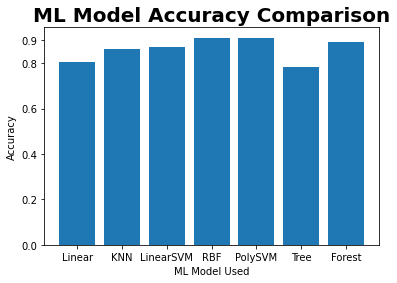

<Figure size 10800x10800 with 0 Axes>

In [20]:
# Visualising the prediction accuracy variations by using different classification models

acc_chart = plt.bar(xlabels,accuracy_list)
plt.xlabel("ML Model Used")
plt.ylabel("Accuracy")
plt.title("ML Model Accuracy Comparison",fontdict={'fontsize':20, 'fontweight':'bold'})
plt.yticks([0.0,0.2,0.4,0.6,0.8,0.9])
plt.figure(figsize=(36,36),dpi=300)
plt.show()

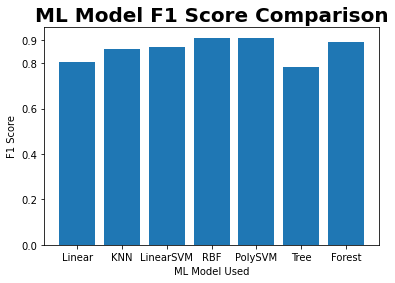

<Figure size 10800x10800 with 0 Axes>

In [21]:
# Visualising the prediction F1 Score variations by using different classification models
# F1 score generalises the precision-recall trade off by combining them into a single value

acc_chart = plt.bar(xlabels,f1_score_list)
plt.xlabel("ML Model Used")
plt.ylabel("F1 Score")
plt.title("ML Model F1 Score Comparison",fontdict={'fontsize':20, 'fontweight':'bold'})
plt.yticks([0.0,0.2,0.4,0.6,0.8,0.9])
plt.figure(figsize=(36,36),dpi=300)
plt.show()

In [16]:
# Scaling & Normalising the training & test features using Standard Scaler & Fitting the transformed data to determine accuracy gain on predictions by RBF SVM

sc = StandardScaler()
train_x = sc.fit_transform(hog_x_train)
test_x = sc.transform(hog_x_test)

rbf = SVC(kernel='rbf')
rbf.fit(train_x,y_train)
pred2 = rbf.predict(test_x)

print(classification_report(y_test,pred2))
print("Accuracy : {}".format(accuracy_score(y_test,pred2)))
print("F1 : {}".format(f1_score(y_test,pred2,average='micro')))

precision    recall  f1-score   support

           0       0.91      0.93      0.92       705
           1       0.98      0.96      0.97       815
           2       0.91      0.93      0.92       707
           3       0.85      0.88      0.86       684
           4       0.92      0.89      0.90       661
           5       0.92      0.90      0.91       605
           6       0.89      0.94      0.92       674
           7       0.93      0.93      0.93       760
           8       0.90      0.89      0.90       693
           9       0.88      0.84      0.86       696

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

Accuracy : 0.9108571428571428
F1 : 0.9108571428571428


In [17]:
# Scaling & Normalising the training & test features using MinMax Scaler & Fitting the transformed data to determine accuracy gain on predictions by RBF SVM

minmax = MinMaxScaler()
hog_x_train_scaled = minmax.fit_transform(hog_x_train)
hog_x_test_scaled = minmax.transform(hog_x_test)

rbf = SVC(kernel='rbf')
rbf.fit(hog_x_train_scaled,y_train)
pred1 = rbf.predict(hog_x_test_scaled)

print(classification_report(y_test,pred1))
print("Accuracy : {}".format(accuracy_score(y_test,pred1)))
print("F1 : {}".format(f1_score(y_test,pred1,average='micro')))

precision    recall  f1-score   support

           0       0.92      0.92      0.92       705
           1       0.98      0.96      0.97       815
           2       0.90      0.93      0.91       707
           3       0.85      0.88      0.87       684
           4       0.93      0.90      0.91       661
           5       0.93      0.91      0.92       605
           6       0.89      0.95      0.92       674
           7       0.94      0.93      0.94       760
           8       0.90      0.89      0.90       693
           9       0.88      0.85      0.86       696

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

Accuracy : 0.9128571428571428
F1 : 0.9128571428571428


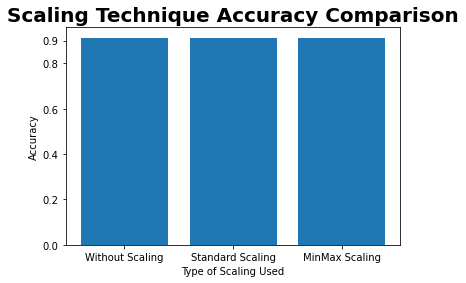

<Figure size 10800x10800 with 0 Axes>

In [18]:
# Visualising the variations in accuracy by normalising & scaling the data using different techniques

x_labels = ["Without Scaling","Standard Scaling","MinMax Scaling"]
acc_list = [acc_svm_rbf,accuracy_score(y_test,pred2),accuracy_score(y_test,pred1)]

acc_chart = plt.bar(x_labels,acc_list)
plt.xlabel("Type of Scaling Used")
plt.ylabel("Accuracy")
plt.title("Scaling Technique Accuracy Comparison",fontdict={'fontsize':20, 'fontweight':'bold'})
plt.yticks([0.0,0.2,0.4,0.6,0.8,0.9])
plt.figure(figsize=(36,36),dpi=300)
plt.show()